In [162]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import figurefirst as fifi
import seaborn as sns
import numpy as np
import pandas as pd
import json
from statannotations.Annotator import Annotator #!pip install seaborn statannotations 
import pickle
from sklearn.metrics import r2_score

### Load data for the plots

In [ ]:
df=pd.read_csv('data_plots/pconsc4.csv')
df1=pd.read_csv('data_plots/random.csv')
df2=pd.read_csv('data_plots/esm.csv')
df3=pd.read_csv('data_plots/alpha.csv')
df4=pd.read_csv('pconsc4_mol_graph.csv')

In [3]:
#Pconsc4
P=df['mean']
Y=df['exp']
ers=df['std']
#Random
P1=df1['mean']
Y1=df1['exp']
ers1=df1['std']
#ESM
P2=df1['mean']
Y2=df2['exp']
ers2=df2['std']
#Alpha
P3=df3['mean']
Y3=df3['exp']
ers3=df3['std']
#Pconsc4_Random_Mol_graph
P4=df4['mean']
Y4=df4['exp']
ers4=df4['std']

In [70]:
n =50
np.random.seed(22)
index = np.random.choice(len(Y), n, replace=False)  
#Pconsc4
x_random = Y[index] 
y_random = P[index] 
ers_random=ers[index]
#Random
x_random1 = Y1[index] 
y_random1 = P1[index] 
ers_random1=ers1[index]
#ESM
x_random2 = Y2[index] 
y_random2 = P2[index] 
ers_random2=ers2[index]
#Alpha
x_random3 = Y3[index] 
y_random3 = P3[index] 
ers_random3=ers3[index]
#Pconsc4_Random_Mol_graph
x_random4 = Y4[index] 
y_random4 = P4[index] 
ers_random4=ers4[index]

In [110]:
sns.set(font_scale = 11.5,style="white")

In [111]:
x = np.linspace(0,6,5)
alpha =  pd.read_csv('alpha.csv')
esm = pd.read_csv('esm.csv')
rand = pd.read_csv('random.csv')
pcons4 = pd.read_csv('pconsc4.csv')

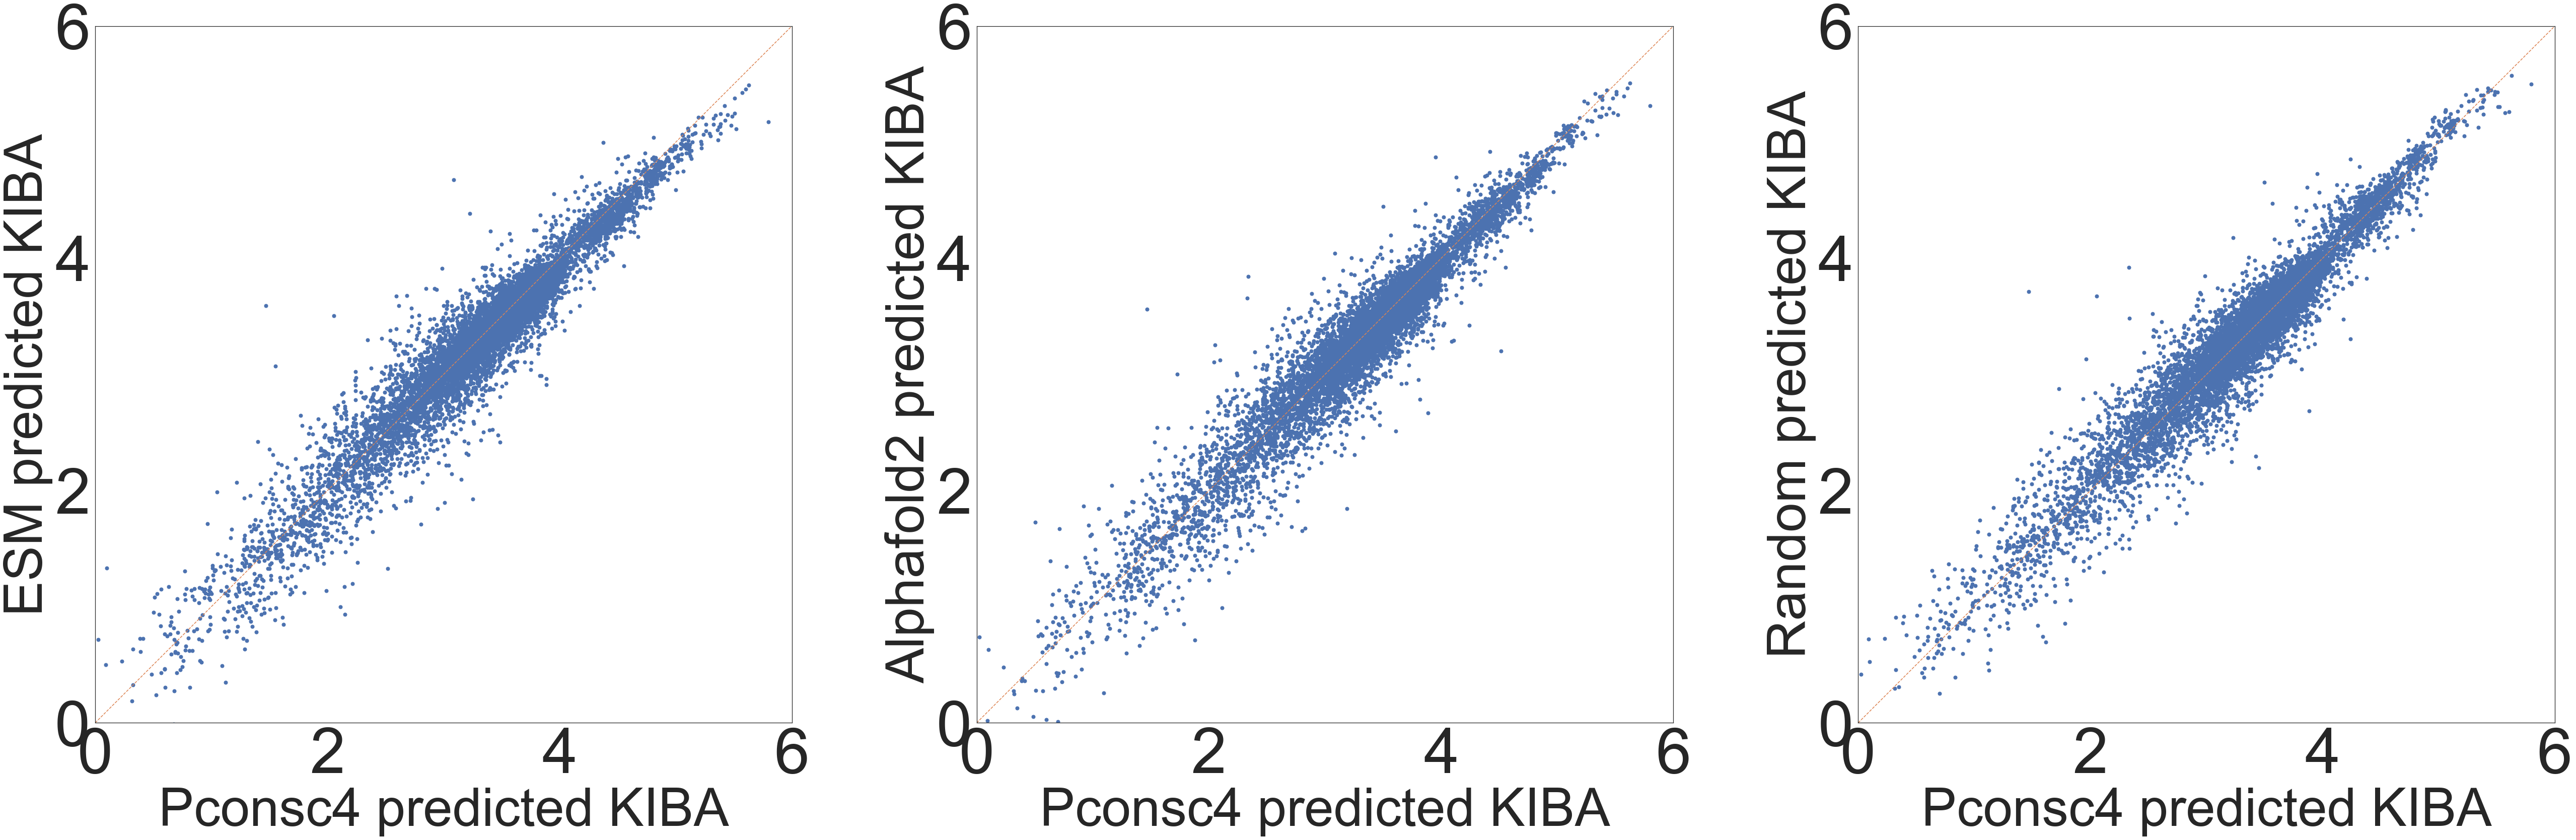

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(75,75), sharex=True)

axes[0].set_aspect('equal', adjustable='box')
axes[0].plot(pcons4['mean'], esm['mean'],lw=0, marker ='o', ms=7) 
axes[0].plot(x,x,'--',ms=5)
#axes[2].errorbar(x_random, x_random2, xerr=ers_random,fmt = 'o',color = 'green', 
 #           ecolor = 'orangered', ms=15,elinewidth = 5, capsize=10,alpha=0.45)

#ax.errorbar(x_random, x_random1, xerr=ers_random, yerr=0, fmt='b', ecolor='b')
#axes[2].errorbar(x_random, x_random2, xerr=0, yerr=ers_random2, fmt='', color = 'green', 
#            ecolor = 'steelblue', ms=15,elinewidth = 5, capsize=10,alpha=0.45)
axes[0].set_ylabel('ESM predicted KIBA',fontsize=105)
axes[0].set_xlabel('Pconsc4 predicted KIBA',fontsize=105)

axes[0].set_ylim([0,6])
axes[0].set_xlim([0,6])
axes[1].set_aspect('equal', adjustable='box')
axes[1].plot(pcons4['mean'], alpha['mean'],lw=0, marker ='o', ms=7) 
axes[1].plot(x,x,'--',ms=5)
#axes[1].errorbar(x_random, x_random3, xerr=ers_random,fmt = 'o',color = 'green', 
#            ecolor = 'orangered', ms=15,elinewidth = 5, capsize=10,alpha=0.45)

#ax.errorbar(x_random, x_random1, xerr=ers_random, yerr=0, fmt='b', ecolor='b')
#axes[1].errorbar(x_random, x_random3, xerr=0, yerr=ers_random3, fmt='', color = 'green', 
#            ecolor = 'steelblue', ms=15,elinewidth = 5, capsize=10,alpha=0.45)
axes[1].set_xlim([0,6])
axes[1].set_xlabel('Pconsc4 predicted KIBA',fontsize=105)
axes[1].set_ylabel('Alphafold2 predicted KIBA',fontsize=105)

axes[1].set_ylim([0,6])


axes[2].set_aspect('equal', adjustable='box')
axes[2].set_xlim([0,6])
axes[2].set_ylim([0,6])
#plt.ylim([0,6])
axes[2].plot(pcons4['mean'], rand['mean'],lw=0, marker ='o', ms=7) 
axes[2].plot(x,x,'--',ms=5)

axes[2].set_xlabel('Pconsc4 predicted KIBA',fontsize=105)
axes[2].set_ylabel('Random predicted KIBA',fontsize=105)
fig.tight_layout()
fig.savefig(os.path.join('results6',  'correlation_proteins' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results6',  'correlation_proteins' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results6',  'correlation_proteins' + '.svg'), dpi=500, bbox_inches='tight')

In [177]:
r2=r2_score(P3,P)
a=r2_score(df3['model1'],df['model1'])
b=r2_score(df3['model2'],df['model2'])
c=r2_score(df3['model3'],df['model3'])
print(r2,np.std([a,b,c]))

0.9342681533473245 0.039706465008493376


In [170]:
np.mean([a,b,c])

0.7927148414556329

In [173]:
c

0.8475311077531448

In [167]:
r2_score(P1,Y1)

0.4790784790918552

In [143]:
sns.set(font_scale = 13,style="white")

In [144]:
fs=135
marker_size=12

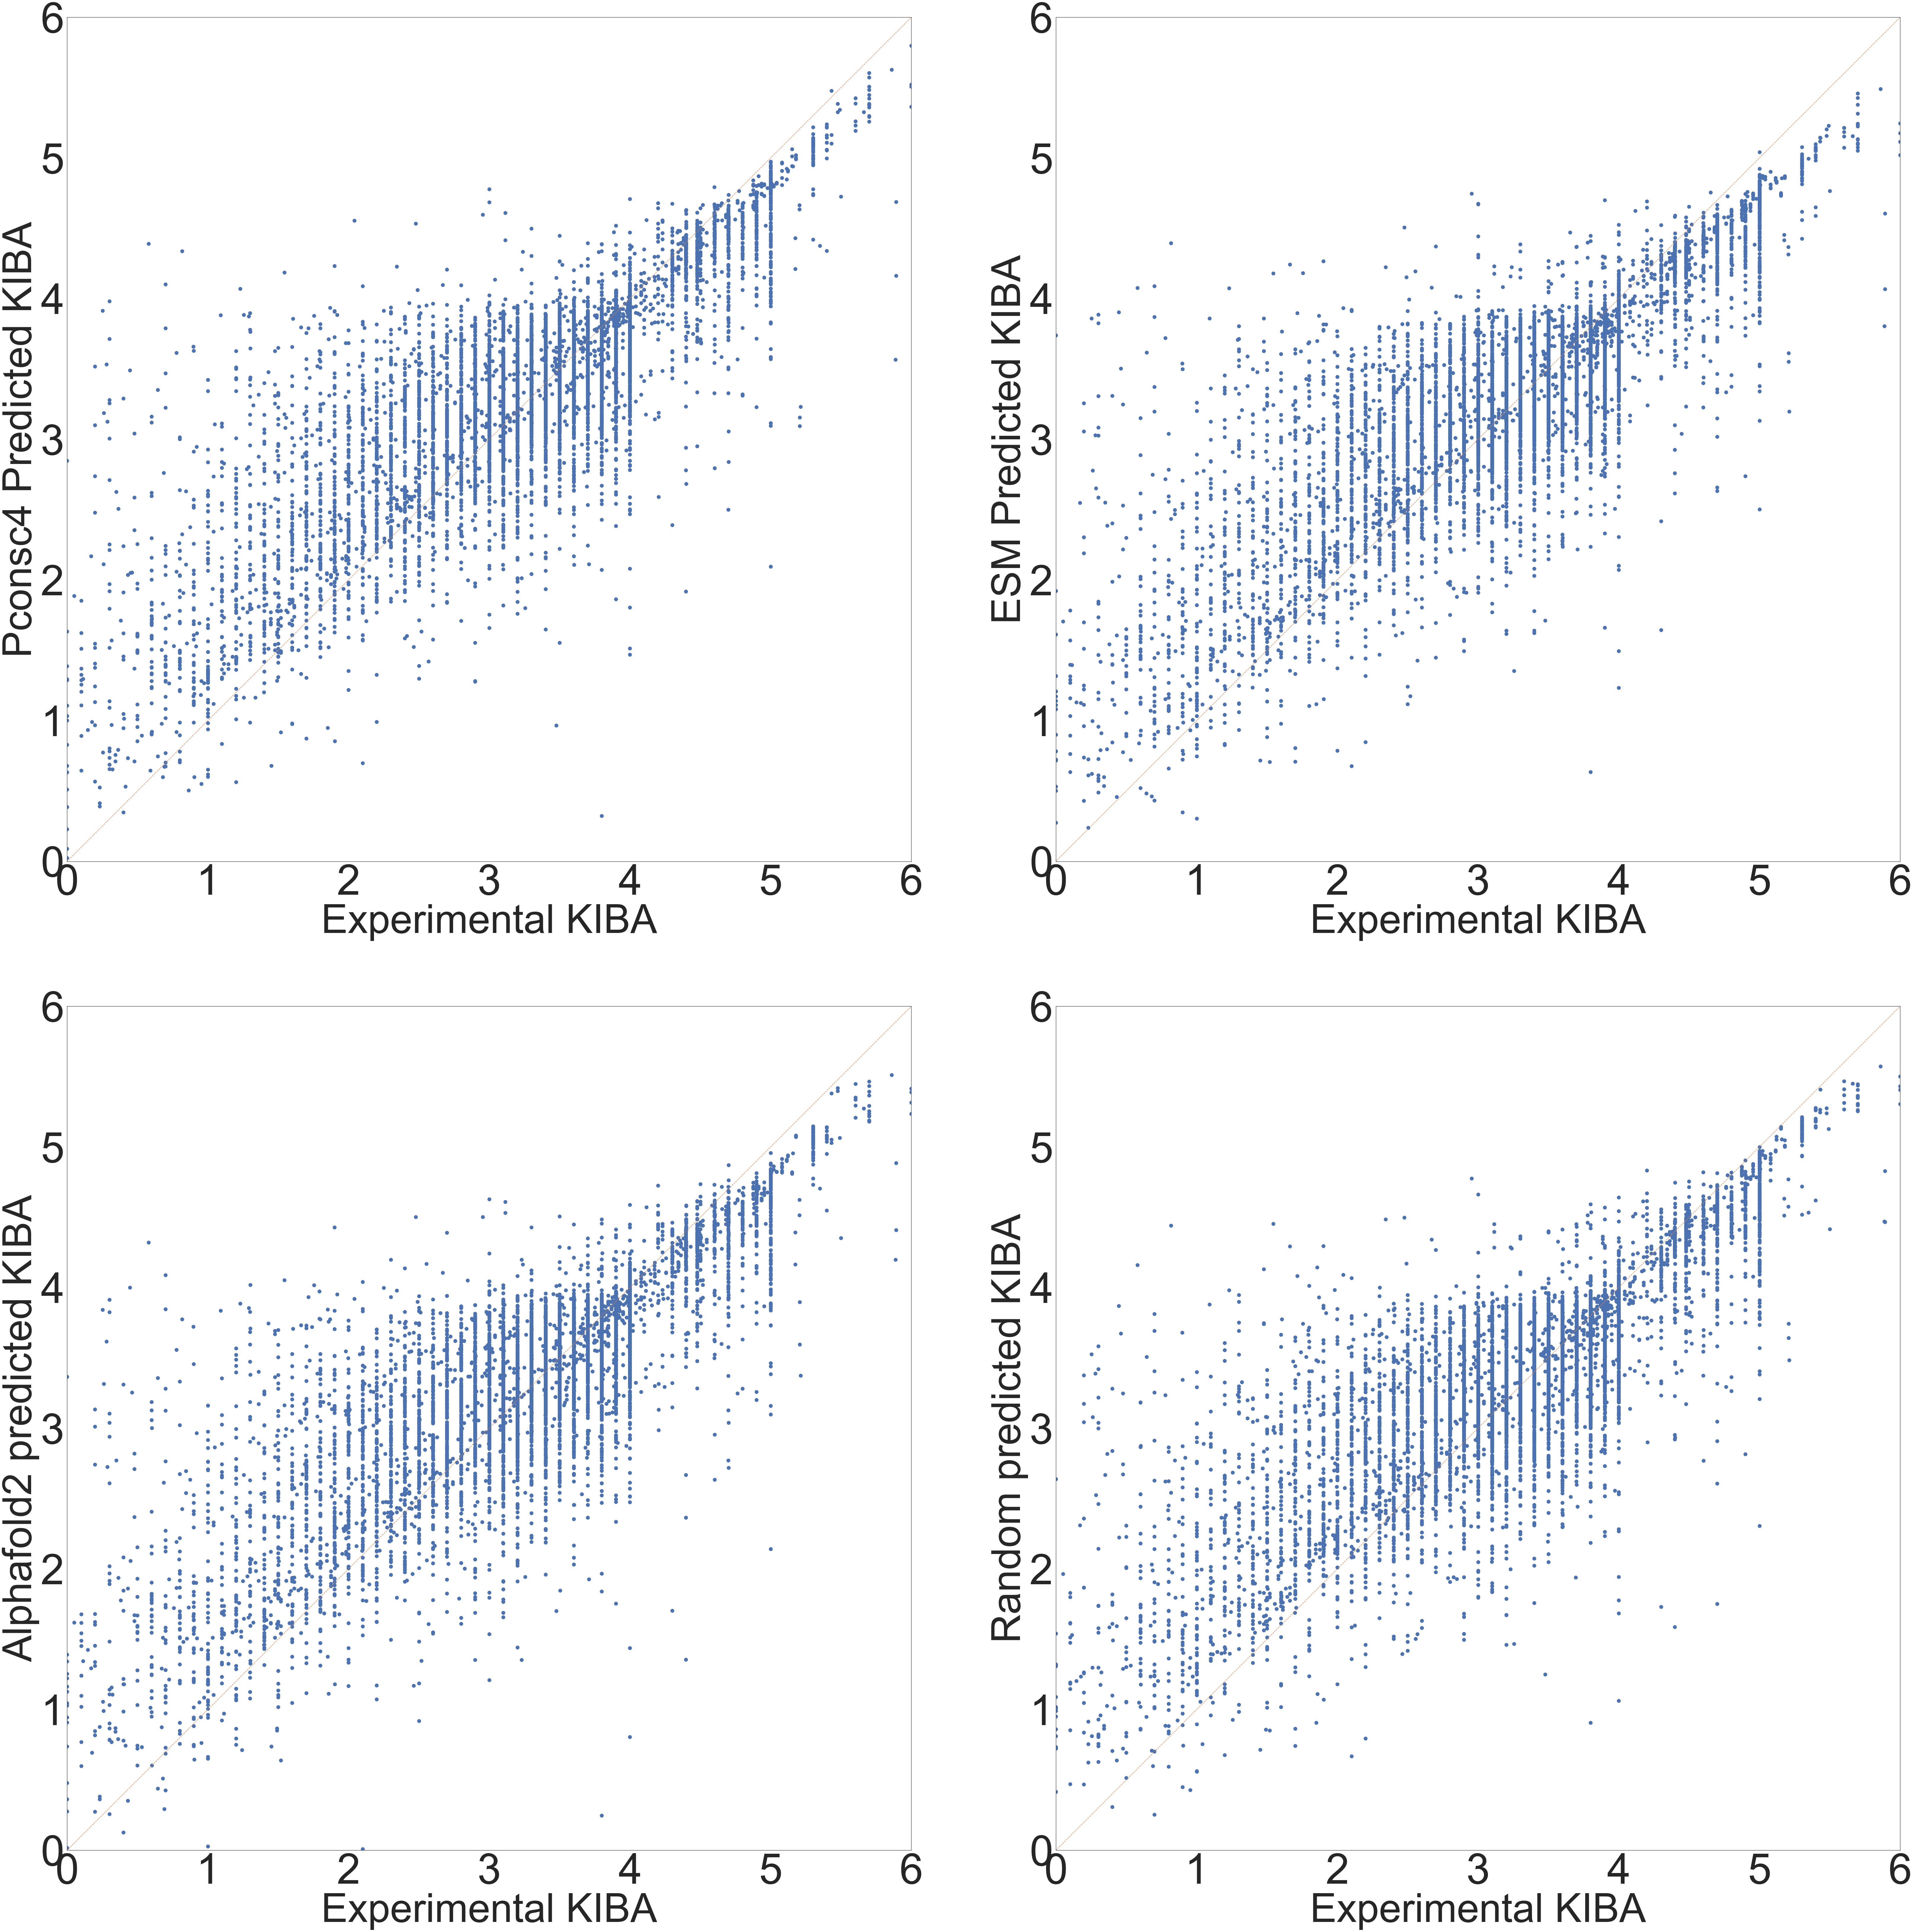

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(95,95))

axes[0][0].set_aspect('equal', adjustable='box')
axes[0][0].plot(pcons4['exp'],pcons4['mean'],lw=0, marker ='o', ms=marker_size) 
axes[0][0].plot(x,x,'--',ms=marker_size)
#axes[2].errorbar(x_random, x_random2, xerr=ers_random,fmt = 'o',color = 'green', 
 #           ecolor = 'orangered', ms=15,elinewidth = 5, capsize=10,alpha=0.45)

#ax.errorbar(x_random, x_random1, xerr=ers_random, yerr=0, fmt='b', ecolor='b')
#axes[2].errorbar(x_random, x_random2, xerr=0, yerr=ers_random2, fmt='', color = 'green', 
#            ecolor = 'steelblue', ms=15,elinewidth = 5, capsize=10,alpha=0.45)
axes[0][0].set_ylabel('Pconsc4 Predicted KIBA',fontsize=fs)
axes[0][0].set_xlabel('Experimental KIBA',fontsize=fs)


axes[0][0].set_ylim([0,6])
axes[0][0].set_xlim([0,6])

axes[0][1].set_aspect('equal', adjustable='box')
axes[0][1].plot(esm['exp'],esm['mean'],lw=0, marker ='o', ms=marker_size) 
axes[0][1].plot(x,x,'--',ms=marker_size)

axes[0][1].set_xlim([0,6])
axes[0][1].set_xlabel('Experimental KIBA',fontsize=fs)
axes[0][1].set_ylabel('ESM Predicted KIBA',fontsize=fs)

axes[0][1].set_ylim([0,6])


axes[1][0].set_aspect('equal', adjustable='box')
axes[1][0].set_xlim([0,6])
axes[1][0].set_ylim([0,6])
#plt.ylim([0,6])
axes[1][0].plot(alpha['exp'],alpha['mean'],lw=0, marker ='o', ms=marker_size) 
axes[1][0].plot(x,x,'--',ms=marker_size)

axes[1][0].set_xlabel('Experimental KIBA',fontsize=fs)
axes[1][0].set_ylabel('Alphafold2 predicted KIBA',fontsize=fs)


axes[1][1].set_aspect('equal', adjustable='box')
axes[1][1].set_xlim([0,6])
axes[1][1].set_ylim([0,6])
#plt.ylim([0,6])
axes[1][1].plot(rand['exp'],rand['mean'],lw=0, marker ='o', ms=marker_size) 
axes[1][1].plot(x,x,'--',ms=marker_size)

axes[1][1].set_xlabel('Experimental KIBA',fontsize=fs)
axes[1][1].set_ylabel('Random predicted KIBA',fontsize=fs)
fig.tight_layout()
fig.savefig(os.path.join('results6',  'pred_vs_exp_proteins' + '.png'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results6',  'pred_vs_exp_proteins' + '.pdf'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results6',  'pred_vs_exp_proteins' + '.svg'), dpi=300, bbox_inches='tight')

In [146]:
sns.set(font_scale = 11,style="white")

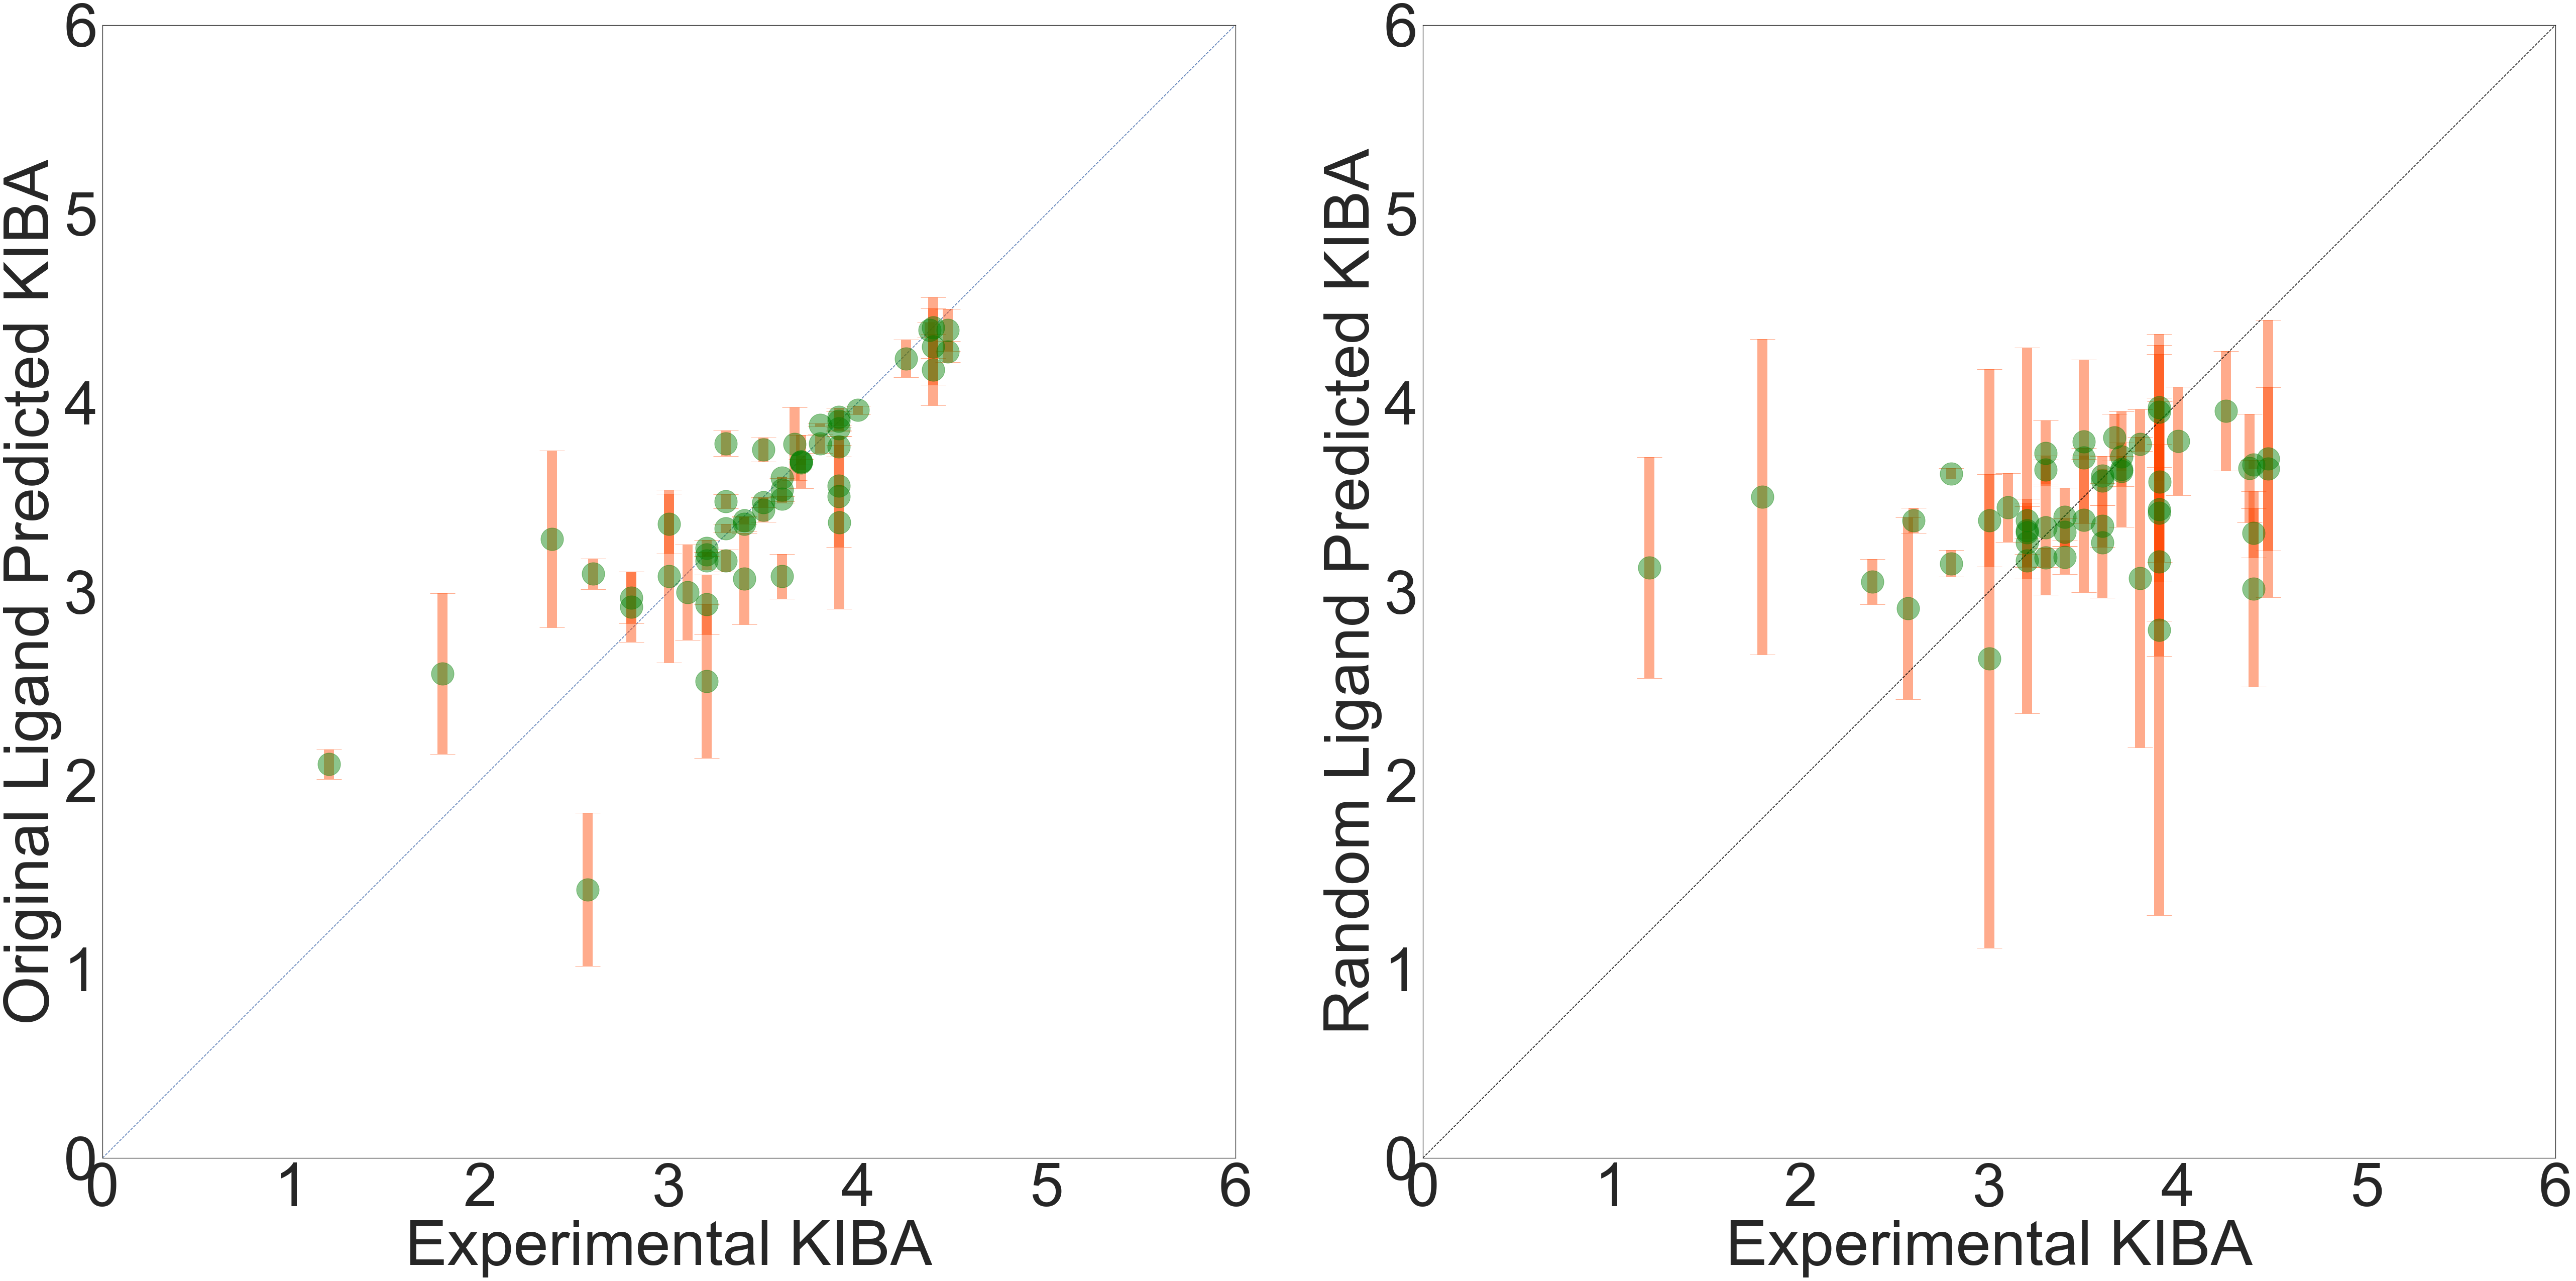

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(75,75), sharex=True)

axes[0].set_aspect('equal', adjustable='box')

axes[0].plot(x,x,'--',ms=12)

axes[0].errorbar(x_random,y_random,  yerr=ers_random,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=45,elinewidth = 20, capsize=25,alpha=0.45,ls='none')



axes[0].set_ylabel('Original Ligand Predicted KIBA',fontsize=125)
axes[0].set_xlabel('Experimental KIBA',fontsize=125)

axes[0].set_ylim([0,6])
axes[0].set_xlim([0,6])

axes[1].set_aspect('equal', adjustable='box')

axes[1].errorbar(x_random4,y_random4,  yerr=ers_random4,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=45,elinewidth = 20, capsize=25,alpha=0.45,ls='none')

axes[1].plot(x,x,color='black',linestyle="--",ms=12)

axes[1].set_ylabel('Random Ligand Predicted KIBA',fontsize=125)
axes[1].set_xlabel('Experimental KIBA',fontsize=125)

axes[1].set_ylim([0,6])
axes[1].set_xlim([0,6])


fig.tight_layout()
fig.savefig(os.path.join('results6',  'errorplot_ligands' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results6',  'errorplot_ligands' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results6',  'errorplot_ligands' + '.svg'), dpi=500, bbox_inches='tight')

In [186]:
r2_score(Y4,P4)

0.010727696870705739

In [184]:
r2_score(df4['mean'],df4['exp'])

-3.60425186458978

In [187]:
r2=r2_score(Y4,P4)
a=r2_score(Y4,df4['model1'])
b=r2_score(Y4,df4['model2'])
c=r2_score(Y4,df4['model3'])
print(r2,np.std([a,b,c]))

0.010727696870705739 0.045950625245189045


In [181]:
sns.set(font_scale = 5,style="white")

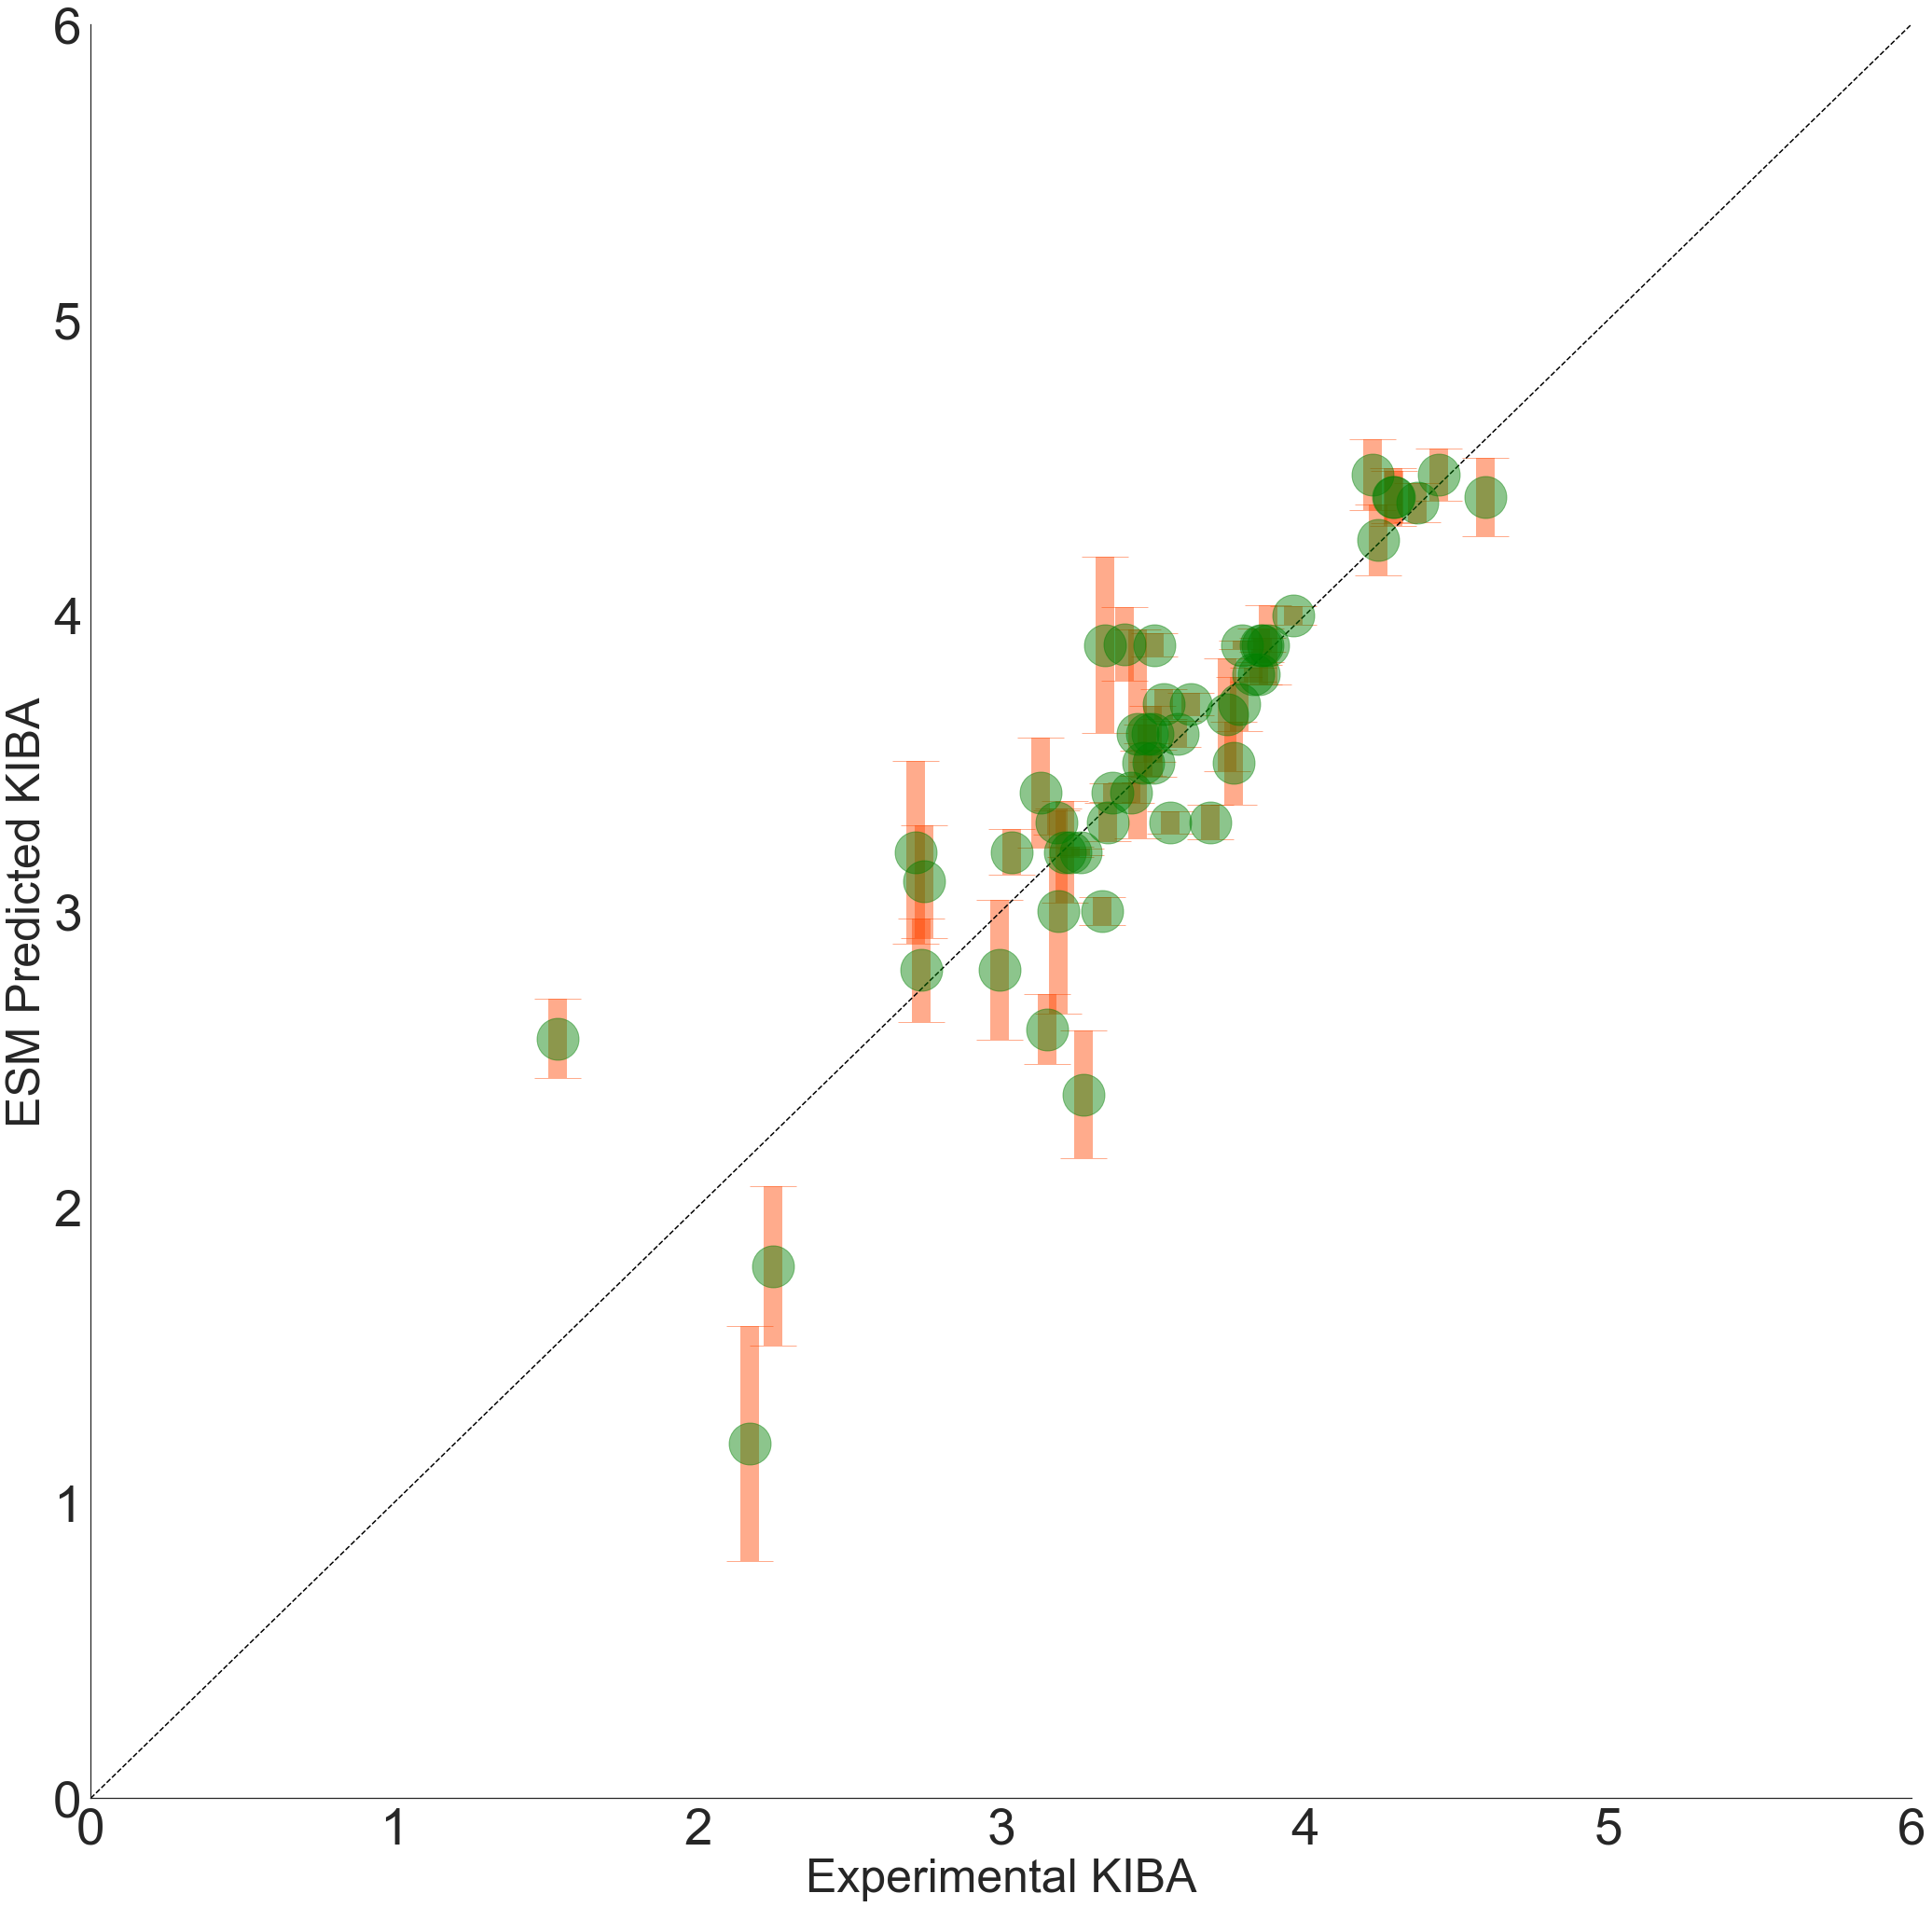

In [160]:
f, ax = plt.subplots(figsize=(35, 35))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(y_random2, x_random2, yerr=ers_random2,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=45,elinewidth = 20, capsize=25,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('ESM Predicted KIBA',fontsize=50)
ax.set_xlabel('Experimental KIBA',fontsize=50)
leg = plt.gca().get_legend()
 
plt.show()
f.savefig(os.path.join('results6',  'ESM vs Experimental' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results6',  'ESM vs Experimental' + '.pdf'), dpi=500, bbox_inches='tight')